# **Projet trouve ton job : analyse**

## Imports
---

In [5]:
!pip install geopandas
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.3 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 100.4 MB/s eta

In [6]:
import pandas as pd
import numpy as np
import os
import unicodedata
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# mount GoogleDrive and set the files path
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Projet Python - Trouve ton job'

path = os.getcwd()
print(f"Le répertoire courant est : {path} \n")

url = "df_travail_poste.csv"
csvExtract = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projet Python - Trouve ton job
Le répertoire courant est : /content/drive/MyDrive/Projet Python - Trouve ton job 



In [7]:
#re-set l'index 
print(csvExtract.columns)

if csvExtract.columns[0] == "Unnamed: 0":
  csvExtract=csvExtract.rename({"Unnamed: 0":"Index"}, axis='columns')
  csvExtract=csvExtract.set_index('Index')

if csvExtract.columns[0] == "Unnamed: 0.1":
  csvExtract=csvExtract.rename({"Unnamed: 0.1":"Index"}, axis='columns')
  csvExtract=csvExtract.set_index('Index')

print(csvExtract.columns)

Index(['Unnamed: 0', 'Date de publication', 'Intitulé du poste', 'Compétences',
       'Lieu', 'Salaire minimum', 'Salaire maximum', 'Type de contrat',
       'Nom de la société', 'Poste', 'Poste_class', 'Niveau'],
      dtype='object')
Index(['Date de publication', 'Intitulé du poste', 'Compétences', 'Lieu',
       'Salaire minimum', 'Salaire maximum', 'Type de contrat',
       'Nom de la société', 'Poste', 'Poste_class', 'Niveau'],
      dtype='object')


In [8]:
csvExtract

,Date de publication,Intitulé du poste,Compétences,Lieu,Salaire minimum,Salaire maximum,Type de contrat,Nom de la société,Poste,Poste_class,Niveau
Index,,,,,,,,,,,
0,2022-12-25,Data Analyst - Publicité,"sql, t-sql, outils",paris,NaN,NaN,CDI,sept lieues,Data analyst,Data,Analyst
1,2022-12-16,Data analyst - H/F,"support, outils, agile, design, big data",paris,NaN,NaN,CDI,edf france,Data analyst,Data,Analyst
2,2022-12-19,Customer Data Analyst (H/F),"crm, data quality, sql, sas, python",paris,NaN,NaN,CDI,hermes,Data analyst,Data,Analyst
3,2022-12-25,Master Data Analyst H/F,"si, support, sap",moussy,NaN,NaN,CDI,tereos,Data analyst,Data,Analyst
4,2023-01-12,Portfolio Data Analyst H/F,"outils, support, decisionnel, sql, test",île-de-france,NaN,NaN,CDI,safran,Data analyst,Data,Analyst
...,...,...,...,...,...,...,...,...,...,...,...
225,2022-12-19,SAP Fiori Developer (H/F),"sap, abap, progiciel, système, support",saint-ouen,NaN,NaN,CDI,engie,Business intelligence,Business,Développeur
226,2023-01-12,ENGIE Digital - Architecte Données (H/F),"digital, outils, securité, sécurité, t-sql",paris,NaN,NaN,CDI,engie,Data architecte,Data,Architecte
227,2023-01-14,Quality Assurance - Lead QA - Lead Acceptance H/F,"test, serveur, jquery, mobile, tdd",boulogne-billancourt,NaN,NaN,CDI,francaise des jeux,Responsable qualité,Support,Autre


In [9]:
#Compétences les plus recherchées: Elargis ton champ de compétences !
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(strip_accents='unicode', tokenizer=lambda x: x.split(', '))
matrix = vectorizer.fit_transform(csvExtract.dropna()['Compétences'])
#Transformation de la matrice en un dataframe avec le nom des compétences
counts = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
counts

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,agile,angularjs,bases de donnees,big data,business intelligence,business objects,cft,cisco,cloud,communication,...,t-sql,tomcat,unix,ux,vba,vmware,wan,web,weblogic,windows
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Ajout d'une ligne 'total' au dataframe
ctotal = counts.copy()
ctotal.loc['total']= ctotal.sum()
# Transposition du dataframe pour classer les compétences par la colomne 'total'
pd.set_option('display.max_rows', None)
competences = ctotal.transpose().sort_values(by=['total'], ascending=False)
competences

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,total
securite,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,14
support,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,14
infrastructure,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,10
cloud,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,10
data management,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
outils,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7
reseau,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,7
python,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6
systeme,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,6
si,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5


In [11]:
# Formatage du dataframe
competences = competences.iloc[:,[-1]]
competences = competences.reset_index()
competences.columns = ['name', 'total']
# Regroupement des compétences figurant dans une seule annonce
compcat = competences.copy()
compcat.loc[compcat['total'] < 2, 'name'] = 'compétences figurant dans une seule annonce'
compcat

,name,total
0,securite,14
1,support,14
2,infrastructure,10
3,cloud,10
4,data management,7
5,outils,7
6,reseau,7
7,python,6
8,systeme,6
9,si,5


In [12]:
# Choix de la palette de couleurs
couleurs =['#636EFA', '#EF553B', '#00CC96', '#FF6692', '#AB63FA', '#19D3F3', '#B6E880', '#FF97FF', '#FECB52']
# Pie chart des principales compétences
fig = px.pie(compcat, names='name', values='total', color_discrete_sequence=couleurs, width=1000, height=1000, hole=.3, title='Principales compétences en pourcentage')
fig.update_traces(texttemplate='%{percent:.1%}')
fig.show()

In [13]:
# Entreprises qui diffusent le plus grand nombre d'annonces: Explore les entreprises qui recrutent le plus !  
entr = csvExtract['Nom de la société'].value_counts()
# Formatage du dataframe
entr = entr.rename_axis('Nom de la société').reset_index(name="Nombre d'annonces")
entr

,Nom de la société,Nombre d'annonces
0,societe generale,38
1,uniware global services,20
2,safran,15
3,naval,9
4,fed it,8
5,trimane,8
6,engie,8
7,edf france,7
8,natixis,6
9,vinci,6


In [14]:
fig = px.funnel(entr, x="Nombre d'annonces", y='Nom de la société', color_discrete_sequence=couleurs, width=1200, height=1600, title="Nombre d'annonces par société")
fig.show()

In [15]:
# Les postes les mieux payés
# Extraction des lignes où les salaires sont présents
df = csvExtract[csvExtract['Salaire minimum'].notna()]
df.reset_index(drop=True, inplace=True)
# Création d'une columne pour le salaire moyen
df['Salaire moyen'] = df[['Salaire minimum', 'Salaire maximum']].mean(axis=1)
df

<ipython-input-15-cd1089bb6af9>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date de publication,Intitulé du poste,Compétences,Lieu,Salaire minimum,Salaire maximum,Type de contrat,Nom de la société,Poste,Poste_class,Niveau,Salaire moyen
0,2022-12-31,Data Analyst BO/Qlick Sense (h/f),"support, sql, data management, business object...",maisons-alfort,45000.0,50000.0,CDD/Intérim,fed it,Data analyst,Data,Analyst,47500.0
1,2022-12-16,Data Analyst / Chef de Projet BI (h/f),"data management, business intelligence, bases ...",paris,60000.0,62000.0,CDI,fed it,Data analyst,Data,Managment,61000.0
2,2022-12-18,Data Scientist - CDI,"marketing, data management, support",rueil-malmaison,60000.0,65000.0,CDI,fed it,Data scientist,Data,Scientist,62500.0
3,2023-01-13,Consultant Data h/f,"big data, oracle, cloud, sap, python",paris,60000.0,70000.0,CDI,selescope,Data consultant,Data,Expert,65000.0
4,2023-01-10,Chef de projets data - analytics H/F,"marketing, outils, digital, ux, mobile",gennevilliers,60000.0,70000.0,CDI,hays france,Data analyst,Data,Managment,65000.0
5,2023-01-14,Responsable Etudes et Projets SI H/F,"si, data management, data quality, méthodologi...",boulogne-billancourt,55000.0,60000.0,CDI,michael page,Chef de projets,Support,Managment,57500.0
6,2022-12-17,Ingénieur d’affaires / Business Developer–Data...,"business intelligence, crm, intelligence artif...",suresnes,70000.0,100000.0,CDI,selescope,Data ingenier,Data,Ingénieur,85000.0
7,2022-12-27,Business Developer – IA / Data Analytics h/f,"intelligence artificielle, business intelligen...",suresnes,70000.0,100000.0,CDI,selescope,Data analyst,Data,Développeur,85000.0
8,2023-01-14,Business Analyst / Business Intelligence,"business intelligence, marketing, intelligence...",rueil-malmaison,35000.0,45000.0,CDI,fed it,Business analyst,Business,Analyst,40000.0
9,2022-12-17,Data Scientist,"machine learning, méthodologie, agile",paris,45000.0,70000.0,CDI,key consulting,Data scientist,Data,Scientist,57500.0


In [16]:
# Nettoyage de la colonne Poste
df['Poste'] = df['Poste'].str.replace('Ingenieurie','Ingenieur')
df['Poste'] = df['Poste'].str.replace('ingenier','ingenieur')
# Classement décroissant des postes avec le meilleur salaire moyen
poste_salaire = df.groupby(['Poste']).mean().sort_values(by=['Salaire moyen'], ascending=False)
poste_salaire

<ipython-input-16-f456d0768cb1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-f456d0768cb1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Salaire minimum,Salaire maximum,Salaire moyen
Poste,,,
Data ingenieur,55000.000000,77500.000000,66250.000000
Data consultant,60000.000000,70000.000000,65000.000000
Data analyst,56250.000000,68000.000000,62125.000000
Business other,57000.000000,62000.000000,59500.000000
Chef de projets,52500.000000,65000.000000,58750.000000
Data scientist,50750.000000,62500.000000,56625.000000
Developpement web,46666.666667,61666.666667,54166.666667
Middleware,42500.000000,60000.000000,51250.000000
Other,42000.000000,60000.000000,51000.000000


In [17]:
fig = px.funnel(poste_salaire, x="Salaire moyen", y=poste_salaire.index, color_discrete_sequence=couleurs[1:], width=1200, height=1200, title="Salaire moyen par poste")
fig.show()

In [18]:
# Le salaire moyen par compétence
# Multiplication du dataframe obtenu avec CountVectorizer par la colonne 'Salaire moyen'
comp_salaire = counts.multiply(df['Salaire moyen'], axis=0)
comp_salaire

,agile,angularjs,bases de donnees,big data,business intelligence,business objects,cft,cisco,cloud,communication,...,t-sql,tomcat,unix,ux,vba,vmware,wan,web,weblogic,windows
0,0.0,0.0,0.0,0.0,0.0,47500.0,0.0,0.0,0.0,0.0,...,47500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,61000.0,0.0,61000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,65000.0,0.0,0.0,0.0,0.0,65000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,85000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,85000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,57500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Calcul de la moyenne pour chaque colomne compétence.
# Pour ne pas prendre en compte les valeurs égales à 0 dans la moyenne, on les remplace par NaN :
comp_salaire.replace(0, np.nan, inplace=True)
comp_salaire.loc['moyenne']= comp_salaire.mean()
# Options de présentation
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')
pd.set_option('precision', 0)
salaire_moyen = comp_salaire.iloc[[-1],:]
salaire_moyen

,agile,angularjs,bases de donnees,big data,business intelligence,business objects,cft,cisco,cloud,communication,crm,data management,data quality,devops,digital,framework,hadoop,hp,iaas,infrastructure,intelligence artificielle,j2ee,java,javascript,jboss,jenkins,lan,langage,linux,machine learning,maintenance,marketing,methodologie,microsoft,middleware,mobile,nosql,optimisation,oracle,outils,paas,poste de travail,python,recette,reseau,saas,sap,securite,si,spring,sql,sql server,support,systeme,t-sql,tomcat,unix,ux,vba,vmware,wan,web,weblogic,windows
moyenne,47500,40000,61000,63625,66400,47500,50000,50000,55400,59500,85000,57071,57500,51700,65833,40000,59500,46500,50000,50300,68750,55000,49500,47500,55000,50500,52500,40000,47600,50750,50000,59000,57500,52500,51250,65000,44000,52500,65000,54071,48500,60000,54500,65000,69833,50000,65000,81111,59000,67500,45000,52500,52357,60667,45000,50000,47400,65000,40000,47500,46500,50500,50000,48500


In [20]:
# Les compétences les mieux payées
#Transposition du dataframe pour classer les compétences par la colomne 'moyenne'
pd.set_option('display.max_rows', None)
pd.set_option('precision', 0)
classement = salaire_moyen.transpose().sort_values(by=['moyenne'], ascending=False)
classement = classement.reset_index()
classement.columns =['Compétences', 'Salaire moyen']
classement

,Compétences,Salaire moyen
0,crm,85000
1,securite,81111
2,reseau,69833
3,intelligence artificielle,68750
4,spring,67500
5,business intelligence,66400
6,digital,65833
7,oracle,65000
8,ux,65000
9,mobile,65000


In [21]:
# Pie chart des compétences les mieux payées
classcat = classement[classement['Salaire moyen']>60000]
fig = px.bar(classcat, x='Compétences', y='Salaire moyen', color='Compétences', width=1200, height=900, title='Compétences les mieux payées', text_auto='.2s')
fig.show()

In [22]:
# Les types de contrat
contrats = csvExtract['Type de contrat'].value_counts()
contrats = contrats.reset_index()
contrats.columns = ['type', 'count']
contrats

,type,count
0,CDI,203
1,Stage,17
2,CDD/Intérim,4
3,Contrat de professionnalisation,3
4,Contrat d'apprentissage,3


In [23]:
# Pie chart des types de contrats
fig = px.pie(contrats, names='type', values='count', color_discrete_sequence=couleurs, width=1000, height=1000, hole=.4, title='Répartition en pourcentage')
fig.update_traces(texttemplate='%{percent:.1%}')
fig.show()

In [24]:
# Localisation des annonces
# Retrait de la catégorie 'île-de-france' pour visualiser les données.
noregion = csvExtract[csvExtract['Lieu'] != 'île-de-france' ]
localisation = noregion['Lieu'].value_counts()
localisation = localisation.reset_index()
localisation.columns = ['nom', 'count']
localisation

,nom,count
0,paris,72
1,la-defense,16
2,fontenay-sous-bois,15
3,bagneux,9
4,saint-ouen,7
5,neuilly-sur-seine,7
6,rueil-malmaison,6
7,saint-germain-en-laye,4
8,nanterre,4
9,levallois-perret,4


In [25]:
# Bar chart en fonction du lieu
fig = px.funnel(localisation, x="count", y='nom', color_discrete_sequence=couleurs[1:], width=1200, height=1200, title="Nombre d'annonces par lieu")
fig.show()

In [26]:
# Localisation par départements
idf_data = pd.read_csv('communes_ile-de-france.csv')
# Formatage des noms de villes.
idf_data['nomcom'] = idf_data['nomcom'].str.lower()
idf_data['nomcom'] = idf_data['nomcom'].str.replace(' ','-')
# Merge sur les noms de communes
merged = pd.merge(noregion, idf_data, how="left", left_on='Lieu', right_on='nomcom')
# Récupération des numéros des départements
dep_dic = {'paris': 75, 'seine-et-marne': 77, 'yvelines': 78, 'essonne': 91, 'hauts-de-seine': 92, 'seine-saint-denis': 93, 'val-de-marne': 94, "val-d'oise": 95}
for n, nom in enumerate(merged['Lieu']):
  if nom in dep_dic.keys():
    merged.iloc[n,-1] = dep_dic[nom]
  if nom == 'la-defense':
    merged.iloc[n,-1] = 92
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date de publication  190 non-null    object 
 1   Intitulé du poste    190 non-null    object 
 2   Compétences          189 non-null    object 
 3   Lieu                 190 non-null    object 
 4   Salaire minimum      43 non-null     float64
 5   Salaire maximum      43 non-null     float64
 6   Type de contrat      190 non-null    object 
 7   Nom de la société    188 non-null    object 
 8   Poste                190 non-null    object 
 9   Poste_class          190 non-null    object 
 10  Niveau               190 non-null    object 
 11  nomcom               99 non-null     object 
 12  numdep               190 non-null    float64
dtypes: float64(3), object(10)
memory usage: 20.8+ KB


In [27]:
# Nombre d'annonces par département
localisation = merged['numdep'].value_counts()
localisation = localisation.reset_index()
localisation.columns = ['dep', 'count']
localisation

,dep,count
0,75,72
1,92,69
2,94,18
3,93,11
4,78,9
5,91,7
6,95,3
7,77,1


In [28]:
# Import de la carte des départements d'Ile-de-France
import geopandas as gpd
df = gpd.read_file('departements-ile-de-france.geojson')
df['code'] = df['code'].astype(int)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   code      8 non-null      int64   
 1   nom       8 non-null      object  
 2   geometry  8 non-null      geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [29]:
# Left merge sur le code des départements: Sors de ton guetto !
locmap = pd.merge(df,localisation, how="left", left_on='code', right_on='dep')
locmap.info()
locmap

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   code      8 non-null      int64   
 1   nom       8 non-null      object  
 2   geometry  8 non-null      geometry
 3   dep       8 non-null      float64 
 4   count     8 non-null      int64   
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 384.0+ bytes


,code,nom,geometry,dep,count
0,75,Paris,"POLYGON ((2.33190 48.81701, 2.33247 48.81825, ...",75,72
1,77,Seine-et-Marne,"POLYGON ((2.57166 48.69201, 2.57166 48.69345, ...",77,1
2,78,Yvelines,"POLYGON ((1.60880 49.07789, 1.61075 49.07548, ...",78,9
3,91,Essonne,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",91,7
4,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",92,69
5,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",93,11
6,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",94,18
7,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",95,3


Text(0.5, 1.0, 'Localisation des entreprises qui recrutent')

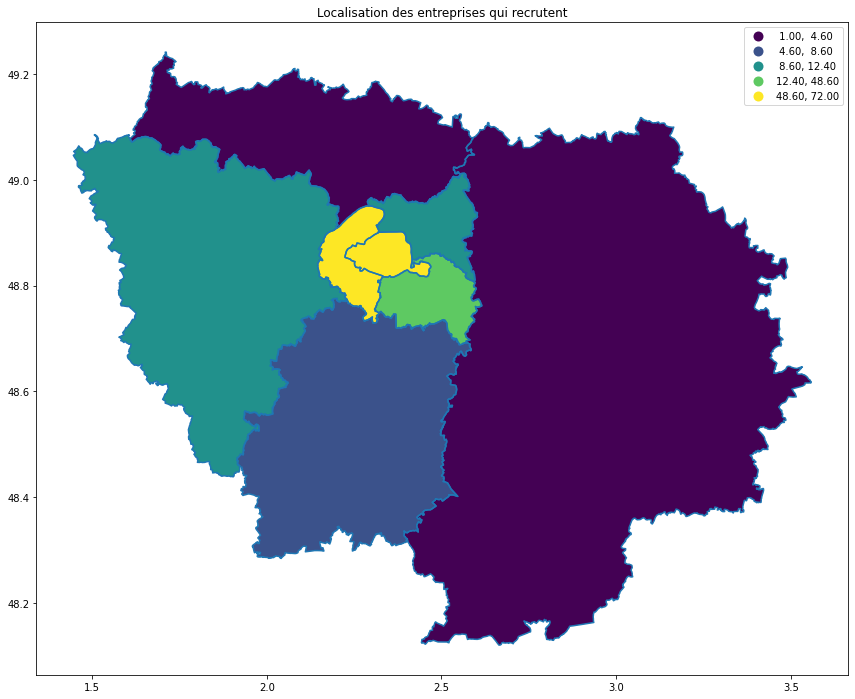

In [30]:
# Carte représentant le nombre d'annonces par département
ax = df['geometry'].boundary.plot(figsize=(16,12))
locmap.plot( column='count', ax=ax, cmap='viridis', scheme='quantiles', legend=True)
ax.set_title('Localisation des entreprises qui recrutent')

In [31]:
# Suppression des colonnes inutilisées
del merged['Date de publication']
del merged['Intitulé du poste']
del merged['nomcom']
merged.head()

,Compétences,Lieu,Salaire minimum,Salaire maximum,Type de contrat,Nom de la société,Poste,Poste_class,Niveau,numdep
0,"sql, t-sql, outils",paris,NaN,NaN,CDI,sept lieues,Data analyst,Data,Analyst,75
1,"support, outils, agile, design, big data",paris,NaN,NaN,CDI,edf france,Data analyst,Data,Analyst,75
2,"crm, data quality, sql, sas, python",paris,NaN,NaN,CDI,hermes,Data analyst,Data,Analyst,75
3,"si, support, sap",moussy,NaN,NaN,CDI,tereos,Data analyst,Data,Analyst,95
4,"support, sql, data management, business object...",maisons-alfort,45000,50000,CDD/Intérim,fed it,Data analyst,Data,Analyst,94


In [36]:
# Choisis l'entreprise qui te convient !
# Scatter plot des postes en fonction des entreprises
fig = px.scatter(merged, y="Nom de la société", x="Poste")
fig.update_traces(marker_size=10, marker_color=couleurs[0])
fig.show()

In [38]:
# Scatter plot des classes de postes en fonction des entreprises
fig = px.scatter(merged, y="Nom de la société", x="Poste_class")
fig.update_traces(marker_size=10, marker_color=couleurs[1])
fig.show()

In [39]:
# Scatter plot des niveaux en fonction des entreprises
fig = px.scatter(merged, y="Nom de la société", x="Niveau")
fig.update_traces(marker_size=10, marker_color=couleurs[2])
fig.show()